---
title: "Making manual error bars / error regions"
author: "Damien Martin"
date: "2024-04-28 12:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Shows how to add error bars/regions manually to plots, both as a region of uncertainty, and on individual data points."
---

# Problem

There are lots of examples of being able to do a linear regression, and have plotnine draw the region of uncertainity automatically.

There are fewer examples (or they are harder to find) of how to add error bars or error regions that you have already calculated.

# Solution

For error regions, we use `geom_ribbon`:
```python
p9.geom_ribbon(mapping=p9.aes(ymin='columnname', ymax='columnname'))
```

For error bars, we use `geom_errorbar` or `geom_pointrange`:
```python
p9.geom_errorbar(mapping=p9.aes(ymin='columnname', ymax='columnname'))
p9.geom_pointrange(mapping=p9.aes(ymin='columnname', ymax='columnname'))
```

The difference is that the `geom_errorbar` draws crossbars at the top and bottom, while `geom_pointrange` only draws the vertical line.

# Example of a ribbon

Let's look at an A/B test, where we are looking for a change in conversion from an email

In [4]:
import pandas as pd 
import plotnine as p9
import numpy as np


emails = pd.read_csv('composing/email.csv')
emails['date'] = pd.to_datetime(emails['date'])
emails.head()

,date,recipients,clicks,ctr
0,2024-02-01,99886,1456,0.014577
1,2024-02-02,100220,1491,0.014877
2,2024-02-03,99637,1498,0.015035
3,2024-02-04,99344,1543,0.015532
4,2024-02-05,100091,1559,0.015576


In [9]:
emails['lower'] =  emails['ctr'] - 1.96 * np.sqrt(emails['ctr']*(1-emails['ctr']) / emails['recipients'])
emails['upper'] =  emails['ctr'] + 1.96 * np.sqrt(emails['ctr']*(1-emails['ctr']) / emails['recipients'])

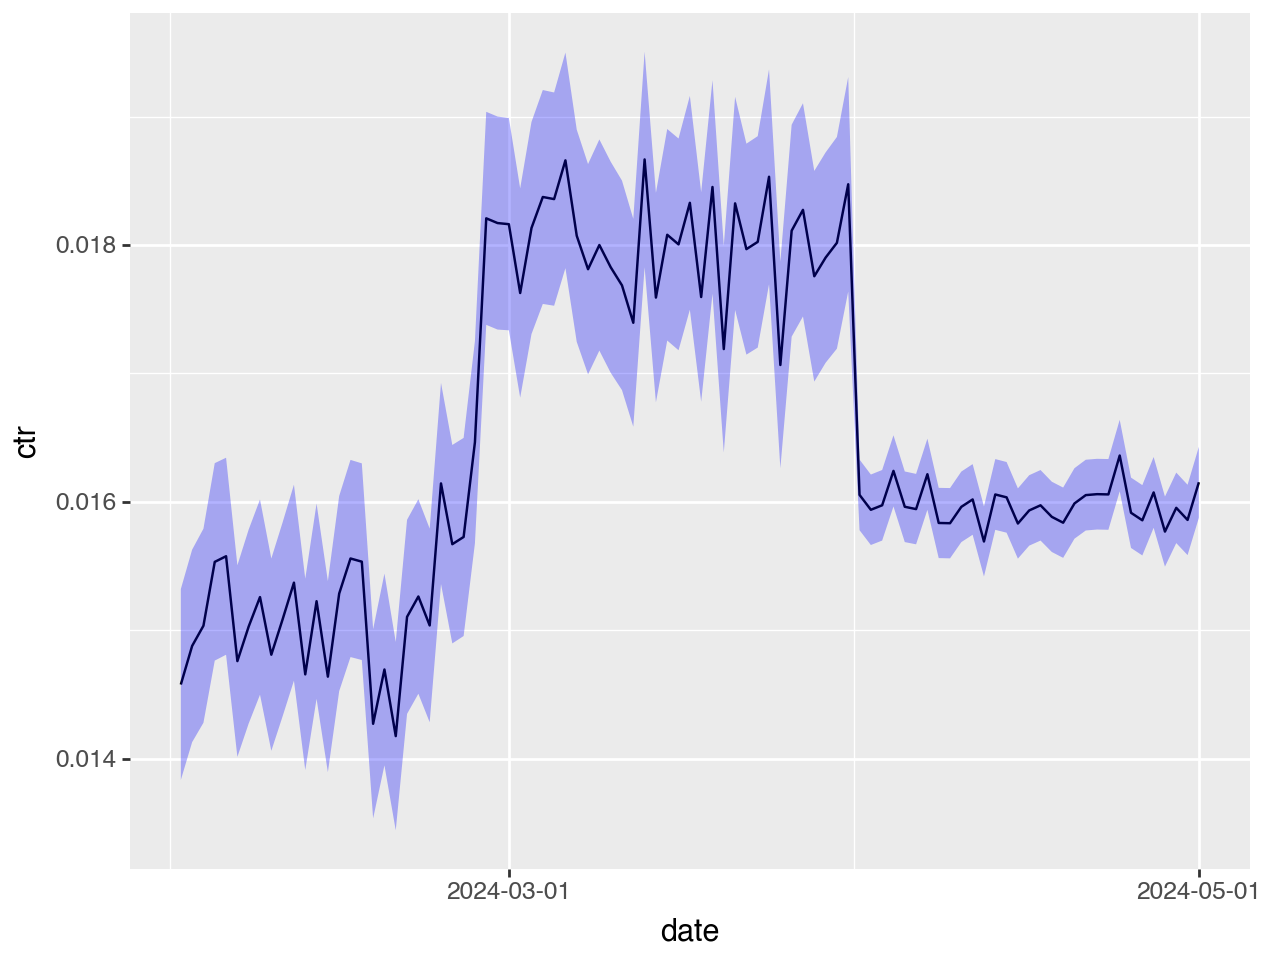

In [15]:
(
    p9.ggplot(emails, p9.aes(x='date', y='ctr'))
    + p9.geom_line()
    + p9.geom_ribbon(mapping=p9.aes(ymin='lower', ymax='upper'), fill='blue', alpha=0.3)
    + p9.labs(x="", y="click-thru-rate")
)

# Example of error bars

We can use the same dataset with points and error bars instead:

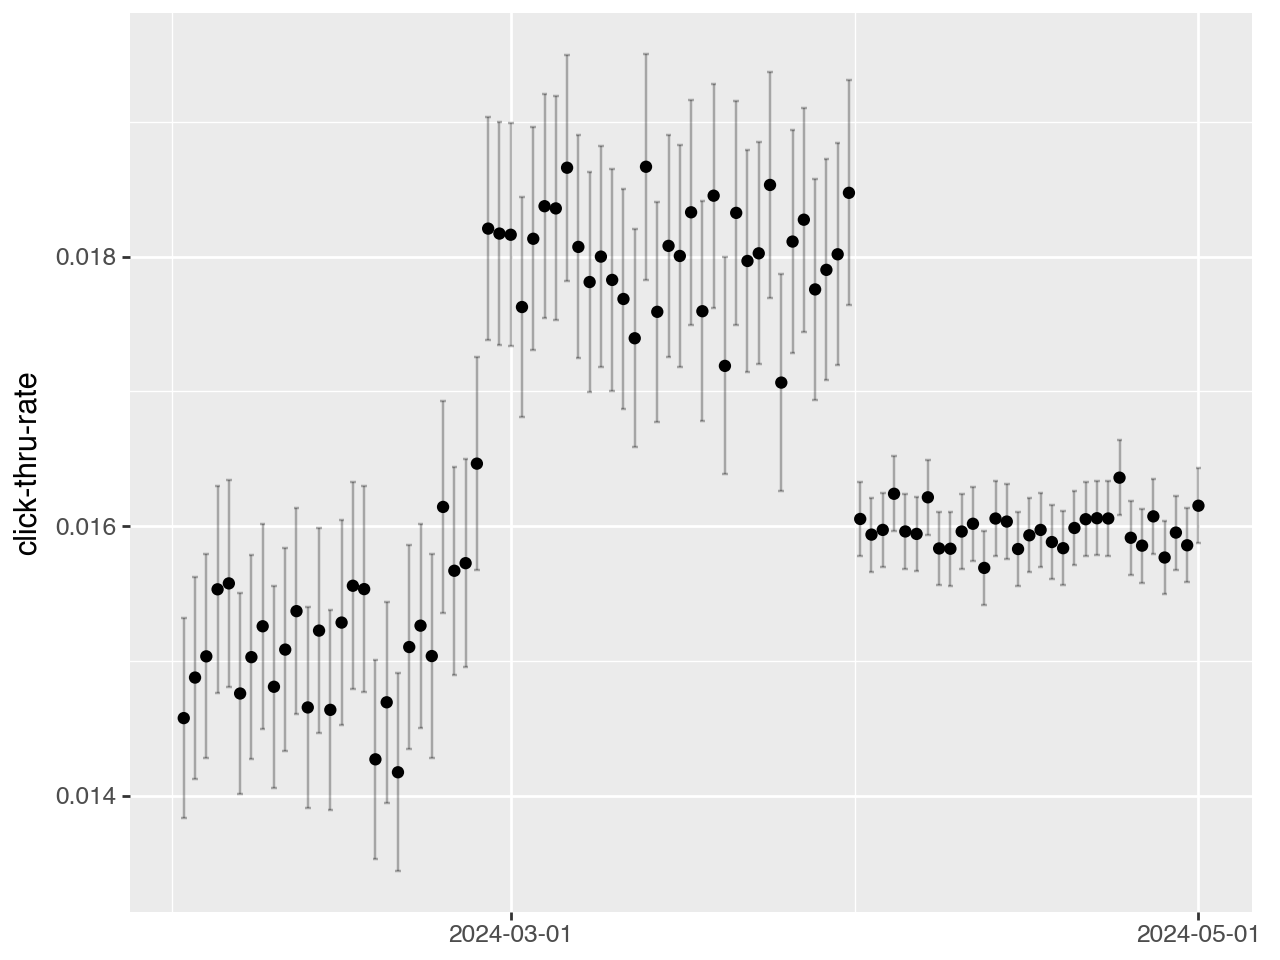

In [20]:
(
    p9.ggplot(emails, p9.aes(x='date', y='ctr'))
    + p9.geom_point()
    + p9.geom_errorbar(mapping=p9.aes(ymin='lower', ymax='upper'), alpha=0.3)
    + p9.labs(x="", y="click-thru-rate")
)